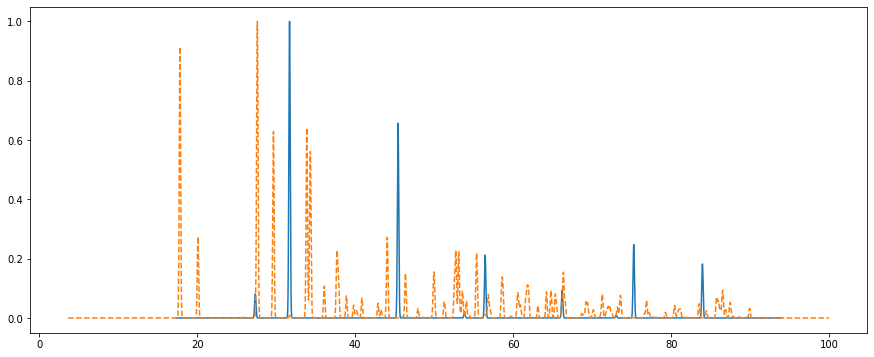

In [8]:
"""
Load two patterns w/ PXRD

Obtain these patterns from both simulates, and call XRD.calculate_symmetry() w/ the patterns
as arguments.
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy
from XRD import Element, crystal, XRD
from scipy.stats import pearsonr
from scipy import integrate


path = './data/'

# _struct1 = crystal('POSCAR',filename=path+'A-1-POSCAR')
_struct1 = crystal('cif',filename='NaCl.cif')
_wavelength = 1.54056
_max_diff_angle = 90
_po = False
_G = 0

_struct2 = crystal('POSCAR',filename=path+'A-1-POSCAR')
# _struct2 = crystal('cif',filename='NaCl.cif')

xrd1 = XRD(_struct1,_wavelength,_max_diff_angle,_po,_G)
sim2thetas1 = xrd1.theta2
simpeaks1 = xrd1.xrd_intensity

xrd2 = XRD(_struct2,_wavelength,_max_diff_angle,_po,_G)
sim2thetas2 = xrd2.theta2
simpeaks2 = xrd2.xrd_intensity

xrd1.get_profile(sim2thetas1, simpeaks1,10000,'gaussian',0.2)
xrd2.get_profile(sim2thetas2, simpeaks2,10000,'gaussian',0.2)
fx = xrd1.g2thetas
fy = xrd1.gpeaks
gx = xrd2.g2thetas
gy = xrd2.gpeaks

plt.figure(figsize=(15,6))
plt.plot(fx,fy,'-')
plt.plot(gx,gy,'--')
plt.show()


In [2]:
def PearsonSim(fpeak,f2theta, gpeak,g2theta):
    xfg = np.concatenate((f2theta,g2theta))
    xfg = np.linspace(xfg[0],xfg[-1],f2theta.shape[0])
    sigF = fpeak-np.mean(fpeak)
    sigG = gpeak-np.mean(gpeak)
    return integrate.trapz(sigF*sigG,xfg)/np.sqrt(integrate.trapz(sigF**2,f2theta) * integrate.trapz(sigG**2,g2theta))

In [ ]:
"""
XRD.get_profile(Num of points in profile, profile function, fwhm) function will return the profiling function (g2thetas and gpeaks) of the simulated patterns. 
"""

# get xrd profiling
fwhm1 = 0.9
fwhm2 = 0.9

xrd1.get_profile(sim2thetas1,simpeaks1,100000,'gaussian',fwhm1)
xrd2.get_profile(sim2thetas2,simpeaks2,100000,'gaussian',fwhm2)
f2thetas = xrd1.g2thetas
fpeaks = xrd1.gpeaks
g2thetas = xrd2.g2thetas
gpeaks = xrd2.gpeaks

"""
Similarity().calculate() takes the profiled intensities to compare (fpeaks, gpeaks, triangle function weight)
"""

from similarity import Similarity
S = Similarity(fpeaks, f2thetas,gpeaks, g2thetas,0.6).calculate()
print(S)
print(pearsonr(fpeaks,gpeaks))
print(PearsonSim(fpeaks,f2thetas,gpeaks,g2thetas))

plt.figure(figsize=(15,8))
plt.plot(f2thetas,fpeaks, 'r-',label = 'f(x)')
plt.plot(g2thetas,-gpeaks, 'k--',label = 'g(x)')
plt.legend()
plt.show()

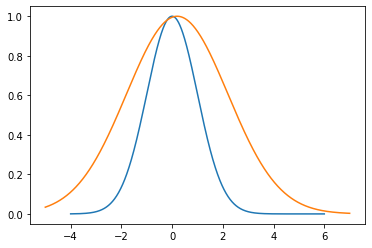

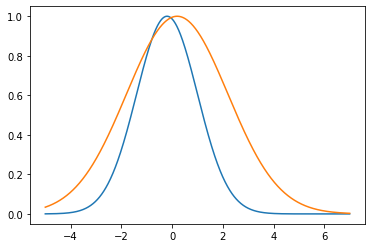

In [54]:
from scipy import interpolate
func = lambda x,sigma,mu: np.exp( - (x - mu)**2 / (2 * sigma**2)) 

fx = np.linspace(-4,6,1000)
fy = func(fx,1,0)
gx = np.linspace(-5,7,1000)
gy = func(gx,2,0.2)
plt.plot(fx,fy)
plt.plot(gx,gy)
plt.show()

begin = min(np.min(fx),np.min(gx))
end = max(np.max(fx),np.max(gx))
fx_new = np.linspace(begin,end,1000)
gx_new = np.linspace(begin,end,1000)
f_interpolate = interpolate.interp1d(fx, fy, 'cubic', fill_value = "extrapolate")
g_interpolate = interpolate.interp1d(gx, gy, 'cubic', fill_value = "extrapolate")
fy_new = f_interpolate(fx)
gy_new = g_interpolate(gx)
plt.plot(fx_new,fy_new)
plt.plot(gx_new,gy_new)
plt.show()